In [38]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization, ZeroPadding2D, Input, AveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [39]:
import keras.backend as K
import math
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)
def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
x_train, y_train, x_test, y_test, classes = load_dataset()

In [40]:
X_train = x_train / 255
X_test = x_test / 255
y_train = y_train.transpose()
y_test = y_test.transpose()
print(f"Number of training examples : {X_train.shape[0]}")
print(f"Number of testing examples : {X_test.shape[0]}")
print(f"shape of training set : {X_train.shape}")
print(f"shape of training labels : {y_train.shape}")
print(f"shape of testing set : {X_test.shape}")
print(f"shape of testing labels : {y_test.shape}")

Number of training examples : 600
Number of testing examples : 150
shape of training set : (600, 64, 64, 3)
shape of training labels : (600, 1)
shape of testing set : (150, 64, 64, 3)
shape of testing labels : (150, 1)


In [45]:
def convModel(input_shape):
    X_input = Input(input_shape)
    
    # 0th Layer
    X = ZeroPadding2D((3,3))(X_input)
    X = Conv2D(32, (7,7), strides = (1,1), name = "conv0")(X)
    X = BatchNormalization(axis = 3, name = "bn0")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2,2), name = "MaxPool0")(X)
    
    # First Layer
    X = Conv2D(32, (7,7), strides = (1,1), name = "conv1")(X)
    X = BatchNormalization(axis = 3, name = "bn1")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2,2), name = 'MaxPool1')(X)
    
    # Second Layer
    X = Conv2D(32, (3,3), strides = (1,1), name = "conv2")(X)
    X = BatchNormalization(axis = 3, name = "bn2")(X)
    X = Activation("relu")(X)
    X = AveragePooling2D((2,2), name = "averagePool0")(X)
    
    # Third Layer
    X = Conv2D(32, (3,3), strides = (1,1), name = "conv3")(X)
    X = BatchNormalization(axis  = 3, name = "bn3")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2,2), name = "maxpool3")(X)
    
    # First Connected Layer
    X = Dense(1, activation = "sigmoid", name = "fc0")(X)
    
    # Second Connected Layer
    X = Flatten()(X)
    X = Dense(1, activation = "sigmoid", name = "fc1")(X)
    
    model = Model(inputs = X_input, outputs = X, name = "convModel")
    return model

In [47]:
emotionDetector = convModel(X_train.shape[1:])
emotionDetector.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = (["accuracy"]))

In [51]:
emotionDetector.fit(X_train, y_train, epochs = 50, batch_size = 16)

Epoch 1/50
600/600 [==============================] - 26s 44ms/step - loss: 0.4154 - accuracy: 0.9733
Epoch 2/50
600/600 [==============================] - 27s 44ms/step - loss: 0.4077 - accuracy: 0.9683
Epoch 3/50
600/600 [==============================] - 26s 44ms/step - loss: 0.3950 - accuracy: 0.9767
Epoch 4/50
600/600 [==============================] - 26s 44ms/step - loss: 0.3839 - accuracy: 0.9800
Epoch 5/50
600/600 [==============================] - 27s 45ms/step - loss: 0.3745 - accuracy: 0.9817
Epoch 6/50
600/600 [==============================] - 26s 43ms/step - loss: 0.3644 - accuracy: 0.9883
Epoch 7/50
600/600 [==============================] - 27s 45ms/step - loss: 0.3576 - accuracy: 0.9867
Epoch 8/50
600/600 [==============================] - 27s 45ms/step - loss: 0.3599 - accuracy: 0.9800
Epoch 9/50
600/600 [==============================] - 26s 43ms/step - loss: 0.3457 - accuracy: 0.9833
Epoch 10/50
600/600 [==============================] - 27s 44ms/step - loss: 0.344

In [53]:
Final_loss, Accuracy = emotionDetector.evaluate(X_test, y_test)
print(f"Loss after training 50 epochs : {Final_loss}")
print(f"Accuracy of the model : {Accuracy*100}%")

150/150 [==============================] - 2s 13ms/step
Loss after training 50 epochs : 0.23011247158050538
Accuracy of the model : 95.99999785423279%


You are happy


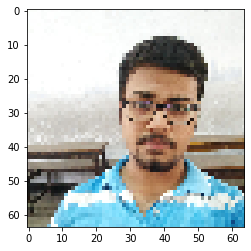

In [67]:
img_path = "desktop/sammya.jpg"
img = image.load_img(img_path, target_size = (64, 64))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)
print("You are happy" if emotionDetector.predict(x)>0.5 else "You are sad")

In [59]:
emotionDetector.summary()

Model: "convModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
MaxPool0 (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        50

## Conclusion:
This model is trained for 50 epochs with a 6 layer deep(4 Convolutional Layers and 2 Fully Connected Layers) convolutional Neural Network.     
Training Accuracy achieved : 99.83%  
Testing Accuracy achieved : 95.99% 